In [1]:
# import internal files
import emulators
import sample
import historymatch
import plot

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats

plt.rcParams.update({'font.size': 10})

np.random.seed(4)

import importlib

In [2]:
def model_eqn_1(x, theta_0, theta_1, theta_2):
    return theta_0 + theta_1*(x) + theta_2*(x**2)

function1 = np.vectorize(model_eqn_1)

In [3]:
def model_eqn_2(x, theta_0, theta_1, theta_2):
    return theta_0 - theta_1*np.sin(x) + (theta_2**1)*np.cos(x)

function2 = np.vectorize(model_eqn_2)

In [4]:
# define parameter space
var_method = 0

theta_0_bound = np.array([-1, 1]).reshape(1,-1)
theta_1_bound = np.array([-1, 1]).reshape(1,-1)
theta_2_bound = np.array([-1, 1]).reshape(1,-1)

parameter_bounds = np.concatenate((theta_0_bound, theta_1_bound, theta_2_bound), axis=0)

theta_0_vals = np.linspace(parameter_bounds[0,0], parameter_bounds[0,1], 100)
theta_1_vals = np.linspace(parameter_bounds[1,0], parameter_bounds[1,1], 100)
theta_2_vals = np.linspace(parameter_bounds[2,0], parameter_bounds[2,1], 100)

theta_vals = np.concatenate((theta_0_vals.reshape(1,-1), theta_1_vals.reshape(1,-1), theta_2_vals.reshape(1,-1)), axis=0)

In [5]:
Nx = 8

def toy_model(theta_0, theta_1, theta_2):
    
    x_bound = np.array([0.1, 1])
    Nx = 8
    xvals = np.linspace(x_bound[0], x_bound[-1], Nx)

    outputs =  []
    for x in xvals:
        output = theta_0 + (theta_1**1)*(x) + theta_2*(x**2)
        outputs.append(output)
    for x in xvals:
        output = theta_0 - theta_1*np.sin(x) + (theta_2**1)*np.cos(x)
        #output = theta_0 - theta_1*(x**(3/2)) + (theta_2**1)*np.cos(x)
        outputs.append(output)
    return np.array(outputs)

In [6]:
# generate observational data with some uncertainty
true_parameters = [-0.1, 0.3, 0.4]

'''output_ratio = (toy_model(-1,-1,-1) - toy_model(1,1,1)) / (toy_model(-1,-1,-1) - toy_model(1,1,1))[0]

var_obs = output_ratio*0.001 # observational uncertainty variance


error_obs = np.zeros(2*Nx)
for i in range(2*Nx):
    error_obs[i] = np.random.normal(0, np.sqrt(var_obs[i]))


obs_data = toy_model(*true_parameters) + error_obs'''




var_obs = np.ones(2*Nx)*0.01 # observational uncertainty variance

error_obs = np.random.normal(0, np.sqrt(var_obs), 2*Nx)

obs_data = toy_model(*true_parameters) + error_obs


In [7]:
nwaves = 3
ndim = 3

In [8]:
importlib.reload(historymatch)

# initialise history matching class
HM = historymatch.HistoryMatch(obs_data,
                               ndim, 'GP', 'hypercube')

In [9]:


ToyModel = historymatch.Simulator(HM)
ToyModel.set_simulator(toy_model)

HM.set_observations(obs_data, np.sqrt(var_obs))
HM.initialize_volume([-1,-1,-1], [1,1,1])

results = HM.run(nwaves=nwaves)

(3, 2)
(3, 2)
Running wave 1
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Convergence : False
(3, 2)
(3, 2)
Relative nonimplausible volume remaining: 0.04
Running wave 2
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Convergence : True
(3, 2)
(3, 2)
Relative nonimplausible volume remaining: 0.034
Running wave 3
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Convergence : True
(3, 2)
(3, 2)
Relative nonimplausible volume remaining: 0.031


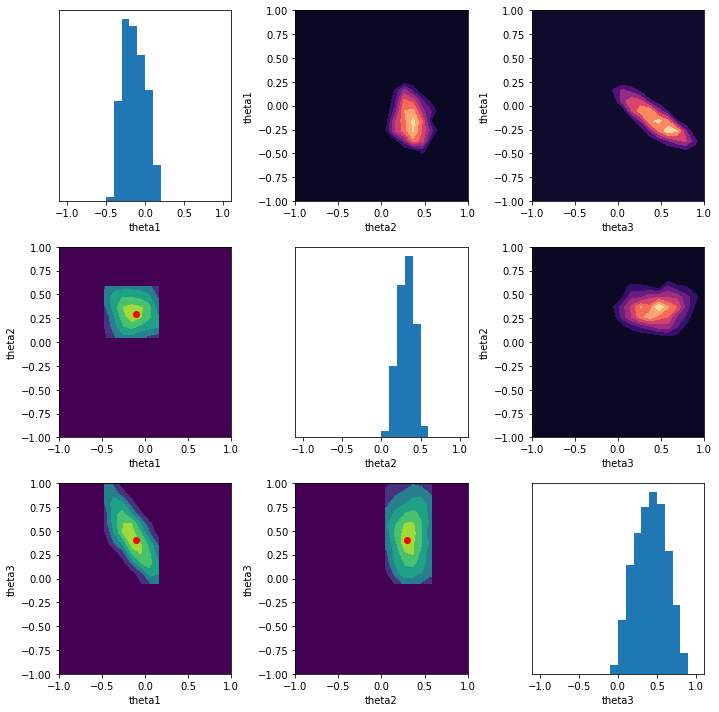

In [10]:
importlib.reload(plot)

fig, axes = plt.subplots(ndim,ndim,figsize=(10,10))
#plot.opticaldepth_1D(results.samples[0], parameter_bounds[0], parameter = 0, bins=20, Fig=(fig,ax1))
    
#plot.plot_implausibility2D(results.samples[0], parameter_bounds, [0,1], bins=20)

plot.plotcorner(results.samples[1], parameter_bounds, 3, Fig=(fig,axes), labels=('theta1', 'theta2', 'theta3'))
axes[1,0].scatter(true_parameters[0],true_parameters[1], color='red')
axes[2,0].scatter(true_parameters[0],true_parameters[2], color='red')
axes[2,1].scatter(true_parameters[1],true_parameters[2], color='red')

In [11]:
results.samples[1].shape

(8000, 4)

In [18]:
with open('data/3D_historymatch_hypercube_samples.txt', 'w') as file:
    for i in range(len(results.samples)):
        np.savetxt(file, results.samples[i])

with open('data/3D_historymatch_hypercube_w1.txt', 'w') as file:
    np.savetxt(file, results.regions[0])
with open('data/3D_historymatch_hypercube_w3.txt', 'w') as file:
    np.savetxt(file, results.regions[2])

#with open('data/EL_Itrain.txt', 'w') as file:
    #np.savetxt(file, results.Itrain)
'''
with open('data/HC_Itrain.txt', 'w') as file:
    for i in range(len(results.Itrain)):
        np.savetxt(file, results.Itrain[i])
        
with open('data/HC_Idata.txt', 'w') as file:
    for i in range(len(results.Idata)):
        np.savetxt(file, results.Idata[i])
'''
print(results.Idata[0].shape)

analytic_mean = np.loadtxt("3D_analytic_mean.txt").reshape(3,)
analytic_cov = np.loadtxt("3D_analytic_cov.txt").reshape(3,3)

#print(results.samples[i])

(8000,)


In [13]:
with open('data/3D_historymatch_hypercube_8z_testpts.txt', 'w') as file3:
    for i in range(len(results.test_pts)):
        np.savetxt(file3, results.test_pts[i])

In [14]:
emulator_output_w1 = np.concatenate((results.emulator_mu[0].reshape(-1,1), results.emulator_sd[0].reshape(-1,1)), axis=1)
print(emulator_output_w1.shape)

(100, 2)


In [15]:
'''with open('data/3D_historymatch_ellipsoid_8z_true_output.txt', 'w') as file2:

    for i in range(nwaves):
        # for plotting
        theta1 = np.linspace(np.min(results.test_pts[i][:,0]),np.max(results.test_pts[i][:,0]),100)
        theta2 = 0.3*np.ones(100)
        theta3 = 0.4*np.ones(100)
        test_grid = np.concatenate((theta1.reshape(-1,1), theta2.reshape(-1,1), theta3.reshape(-1,1)), axis=1)

        true_output = np.zeros(100)
        for i in range(100):
            true_output[i] = toy_model(*test_grid[i])[-1]

        np.savetxt(file2, true_output)


#theta1 = np.linspace(-1,1,100)
#theta2 = -1*np.ones(100)
#theta3 = -1*np.ones(100)

#test_grid = np.concatenate((theta1.reshape(-1,1), theta2.reshape(-1,1), theta3.reshape(-1,1)), axis=1)'''

'''
print(np.min(results.test_pts[1][:,0]))
print(np.max(results.test_pts[1][:,0]))

with open('data/3D_HC_true_output.txt', 'w') as file2:
    for i in range(nwaves):
        np.savetxt(file2, results.z_grid[i])

    
with open('data/3D_HC_emulator_output.txt', 'w') as file4:
    for i in range(nwaves):
        np.savetxt(file4, np.concatenate((results.emulator_mu[i].reshape(-1,1), results.emulator_sd[i].reshape(-1,1)), axis=1))'''

"\nprint(np.min(results.test_pts[1][:,0]))\nprint(np.max(results.test_pts[1][:,0]))\n\nwith open('data/3D_HC_true_output.txt', 'w') as file2:\n    for i in range(nwaves):\n        np.savetxt(file2, results.z_grid[i])\n\n    \nwith open('data/3D_HC_emulator_output.txt', 'w') as file4:\n    for i in range(nwaves):\n        np.savetxt(file4, np.concatenate((results.emulator_mu[i].reshape(-1,1), results.emulator_sd[i].reshape(-1,1)), axis=1))"

In [16]:
def get_cov_ellipse(cov, centre, nstd, ax, color):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """

    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(np.abs(eigvals))
    
    t = np.linspace(0, 2*np.pi, 100)
    Ell = np.array([0.5*width*np.cos(t) , 0.5*height*np.sin(t)]) 
    R_rot = np.array([[np.cos(theta) , -np.sin(theta)],[np.sin(theta), np.cos(theta)]])  
    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
    
    ax.plot( centre[0]+Ell_rot[0,:] , centre[1]+Ell_rot[1,:], color=color)

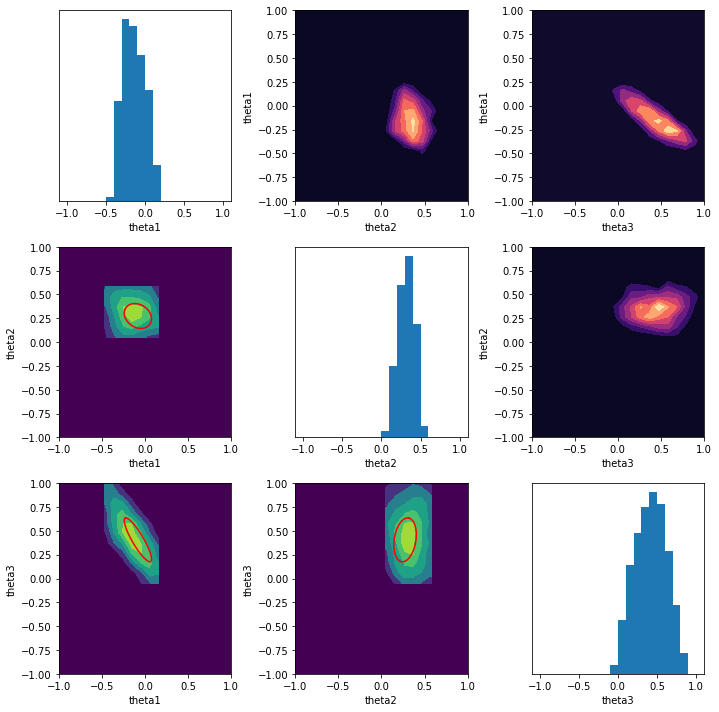

In [17]:
fig, axes = plt.subplots(ndim,ndim,figsize=(10,10))
#plot.opticaldepth_1D(results.samples[0], parameter_bounds[0], parameter = 0, bins=20, Fig=(fig,ax1))
    
#plot.plot_implausibility2D(results.samples[0], parameter_bounds, [0,1], bins=20)

plot.plotcorner(results.samples[1], parameter_bounds, 3, Fig=(fig,axes), labels=('theta1', 'theta2', 'theta3'))

H = analytic_cov

get_cov_ellipse(np.array([[H[0,0], H[0,1]],[H[1,0], H[1,1]]]), [analytic_mean[0], analytic_mean[1]], 3, axes[1,0], 'red')
get_cov_ellipse(np.array([[H[0,0], H[0,2]],[H[2,0], H[2,2]]]), [analytic_mean[0], analytic_mean[2]], 3, axes[2,0], 'red')
get_cov_ellipse(np.array([[H[1,1], H[1,2]],[H[2,1], H[2,2]]]), [analytic_mean[1], analytic_mean[2]], 3, axes[2,1], 'red')


#axes[1,0].scatter(true_parameters[0],true_parameters[1], color='red')
#axes[2,0].scatter(true_parameters[0],true_parameters[2], color='red')
#axes[2,1].scatter(true_parameters[1],true_parameters[2], color='red')